# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

For working through this notebook, you are expected to have a very basic understanding of:
* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_ind_from_stats, ttest_ind, norm
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [58]:
medical.shape

(1338, 8)

In [59]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

Text(0.5, 1.0, 'medical.charges')

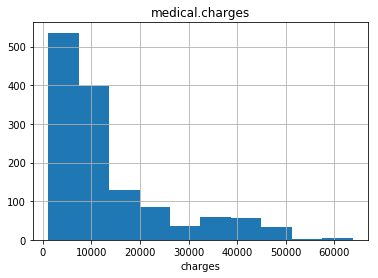

In [60]:
medical.charges.hist()
plt.xlabel('charges')
plt.title('medical.charges')

In [61]:
medical_mean = medical.charges.mean()
medical_sd = medical.charges.std(ddof=1)
print(f'The mean medical charge is ${medical_mean:.2f} and standard deviation is ${medical_sd:.2f}')

The mean medical charge is $13270.42 and standard deviation is $12110.01


The data sampled above is not a normal distribution and the standard deviation (population SD used) is not a very good description of the data.

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed above, to apply?

__A:__Assuming the data is a random sample of charges, the central limit theroem sates that the sample mean is expected to be equal to the population mean. The standard deviation is large indicating a large spread in the data, however one standard deviation below the mean is almost to the lower limit of the data justifying the position that the actual average charge has not fallen below 12000. The most appropriate requentist test would be the t-test, as the population standard deviation is not known, only inferred.

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__ The concern is that the mean is lower than reported, so this would require a one-sided interval.

In [62]:
norm?

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption, or assumptions, are we making here?

Thse calculations are based one the assumption that the data is normally distributed, and that both samples have the same variance. 

__A:__The null hypothesis is that people with insurance are not being charged a different amount than people without insurance. An alternative hypothesis is that people with insurance *are* being charged a different amount than people without insurance.

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [76]:
insured = medical[medical.insuranceclaim == True]
not_insured = medical[medical.insuranceclaim == False]
insured.shape, not_insured.shape

((783, 8), (555, 8))

In [96]:
insurance_mean = insured.charges.mean()
insurance_samp_sd = insured.charges.std(ddof=0)
no_insurance_mean = not_insured.charges.mean()
no_insurnce_samp_sd = not_insured.charges.std(ddof=0)

insurance_mean, insurance_samp_sd, no_insurance_mean, no_insurnce_samp_sd
#insurance_mean, no_insurance_mean

(16423.928276537663, 14036.956250260411, 8821.421892306294, 6440.699841605233)

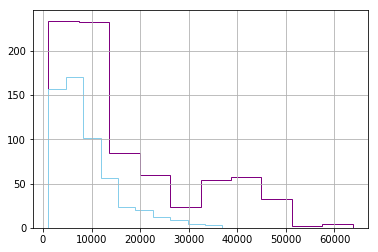

In [114]:
insured.charges.hist(histtype='step', color='purple')
not_insured.charges.hist(histtype='step', color='skyblue')

In [105]:
def pooled_sd(s0, n0, s1, n1):
    """Calculate the pooled standard deviation of two groups where:
    s0, n0 is sample standard deviation and sample number of elements of first group
    s1, n1 is sampe standard deviation  and sample number of elements of second group"""
    return np.sqrt(((n0 -1) * s0**2 + (n1 - 1) * s1**2) / (n0 + n1 - 2))

In [106]:
def t_test(mean0, len0, mean1, len1, pooled_sd_value):
    """Calculate the t test statistic between two populations were:
    mean0, len0 is the mean and length of first population
    mean1, len1 is the mean and length of the second population
    pooled_sd_value is the pooled standard deviation value"""
    return (mean0 - mean1) / (pooled_sd_value * (np.sqrt(1 / len0 + 1 / len1)))

In [107]:
#calculating pooled std using our own function
pooled_sd_value_1 = pooled_sd(insurance_samp_sd, len(insured), no_insurnce_samp_sd, len(not_insured))
pooled_sd_value_1

11512.282899205744

In [108]:
#calculate t-test
calc_t_test = t_test(insurance_mean, len(insured), no_insurance_mean, len(not_insured), pooled_sd_value_1)
print(f't-test = {calc_t_test}')

t-test = 11.901306943555385


In [101]:
ttest_ind_from_stats(insurance_mean, insurance_samp_sd, len(insured), no_insurance_mean, no_insurnce_samp_sd, len(not_insured))

Ttest_indResult(statistic=11.901306943555387, pvalue=4.090550214373679e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and that is much easier to use. All you need to do is pass it your data.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you have good hands-on experience of
* how you can use the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* how to then perform inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test